# Import Package

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

from collections import Counter as c

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pickle

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 26)

# Loading dataset

In [2]:
df= pd.read_csv('kidney_disease.csv')

In [3]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.shape

(400, 26)

# Modifying the Dataset

Dropping id column

In [5]:
df.drop('id', axis = 1, inplace = True)

In [6]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


Renaming column names to make it more user-friendly


In [7]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [8]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [9]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

Extracting categorical and numerical columns

In [11]:
cat_cols=set(df.dtypes[df.dtypes=='O'].index.values)
print(cat_cols)

{'bacteria', 'red_blood_cell_count', 'white_blood_cell_count', 'peda_edema', 'class', 'pus_cell_clumps', 'appetite', 'aanemia', 'pus_cell', 'diabetes_mellitus', 'coronary_artery_disease', 'red_blood_cells', 'hypertension', 'packed_cell_volume'}


In [12]:
num_cols=set(df.dtypes[df.dtypes!='O'].index.values)
print(num_cols)

{'haemoglobin', 'serum_creatinine', 'sugar', 'potassium', 'blood_pressure', 'blood_glucose_random', 'sodium', 'age', 'specific_gravity', 'blood_urea', 'albumin'}


In [13]:
cat_cols.remove('red_blood_cell_count')
cat_cols.remove('packed_cell_volume')
cat_cols.remove('white_blood_cell_count')
print(cat_cols)


{'bacteria', 'peda_edema', 'class', 'pus_cell_clumps', 'appetite', 'aanemia', 'pus_cell', 'diabetes_mellitus', 'coronary_artery_disease', 'red_blood_cells', 'hypertension'}


In [14]:
num_cols.add('red_blood_cell_count')
num_cols.add('packed_cell_volume')
num_cols.add('white_blood_cell_count')
print(num_cols)

{'red_blood_cell_count', 'haemoglobin', 'serum_creatinine', 'white_blood_cell_count', 'sugar', 'potassium', 'blood_pressure', 'blood_glucose_random', 'sodium', 'age', 'specific_gravity', 'blood_urea', 'albumin', 'packed_cell_volume'}


looking at unique values in categorical columns

In [15]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

bacteria has ['notpresent' 'present' nan] values

peda_edema has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values

pus_cell_clumps has ['notpresent' 'present' nan] values

appetite has ['good' 'poor' nan] values

aanemia has ['no' 'yes' nan] values

pus_cell has ['normal' 'abnormal' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

red_blood_cells has [nan 'normal' 'abnormal'] values

hypertension has ['yes' 'no' nan] values



# Removing Ambiguity

Replacing the incorrect values

In [16]:
df['class']=df['class'].replace("ckd\t","ckd")
df['coronary_artery_disease']=df.coronary_artery_disease.replace('\tno','no')
df['diabetes_mellitus']=df.diabetes_mellitus.replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'})

In [17]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

bacteria has ['notpresent' 'present' nan] values

peda_edema has ['no' 'yes' nan] values

class has ['ckd' 'notckd'] values

pus_cell_clumps has ['notpresent' 'present' nan] values

appetite has ['good' 'poor' nan] values

aanemia has ['no' 'yes' nan] values

pus_cell has ['normal' 'abnormal' nan] values

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

red_blood_cells has [nan 'normal' 'abnormal'] values

hypertension has ['yes' 'no' nan] values



In [18]:
df['pus_cell_clumps']=df['pus_cell_clumps'].replace(to_replace={'\t43':'43','\t?':'Nan'})
df['red_blood_cell_count']=df.red_blood_cell_count.replace('\t?','Nan')
df['white_blood_cell_count']=df.white_blood_cell_count.replace(to_replace={'\t?':'Nan','\t6200':'6200',' \t8400':'8400'})

Converting necessary columns to numerical type

In [19]:
df.packed_cell_volume = pd.to_numeric(df.packed_cell_volume, errors='coerce')
df.white_blood_cell_count = pd.to_numeric(df.white_blood_cell_count, errors='coerce')
df.red_blood_cell_count = pd.to_numeric(df.red_blood_cell_count, errors='coerce')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

Checking numerical features distribution

In [21]:
df['class']=df['class'].map({'ckd':1,'notckd':0})

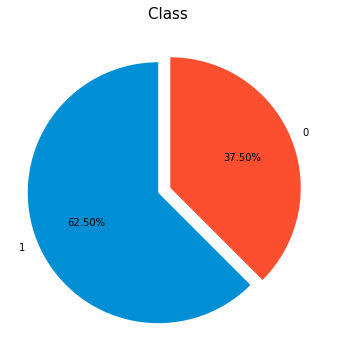

In [22]:
attr_count=df['class'].value_counts()
attr_label=df['class'].value_counts().index

# plot
fig,ax=plt.subplots(figsize=(14,6))
ax.pie(attr_count,explode=(0.1,0),labels=attr_label,autopct='%.2f%%',startangle=90)
ax.set_title("Class ",fontsize=15)
plt.show()

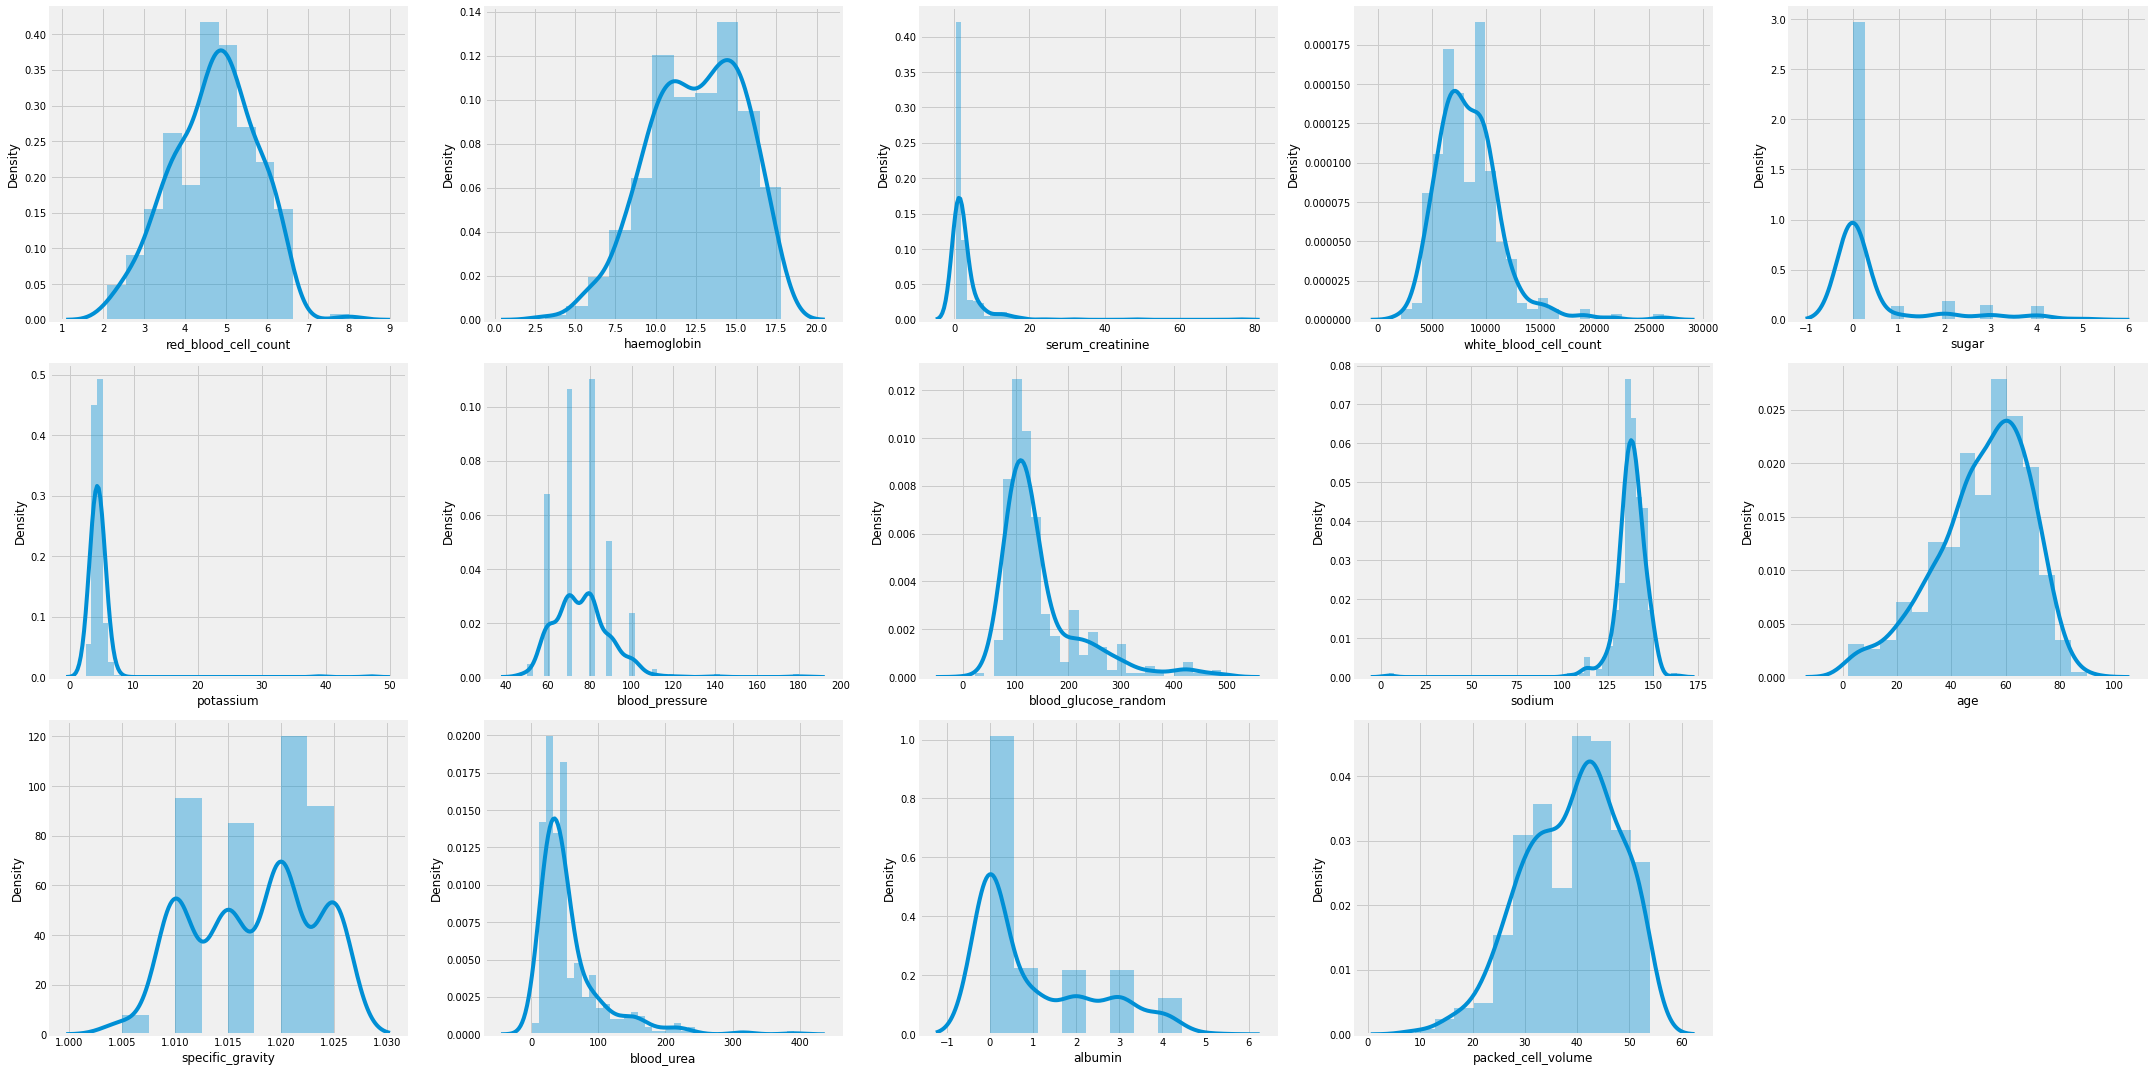

In [23]:
plt.figure(figsize = (30, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

looking at categorical columns

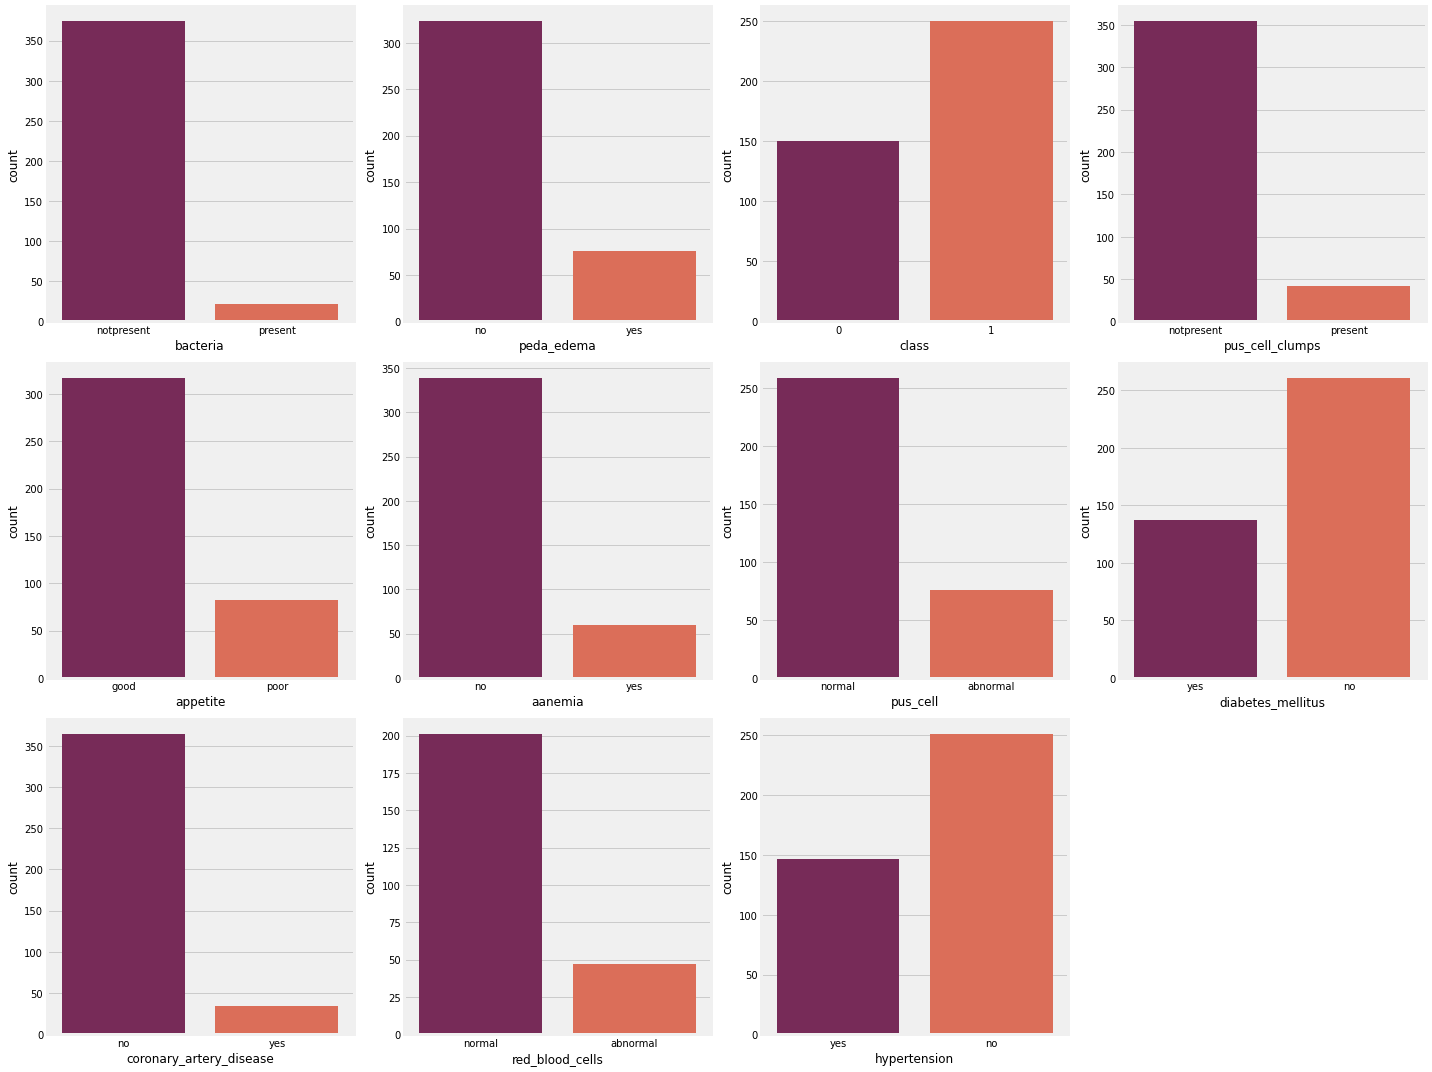

In [24]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

Heatmap of data

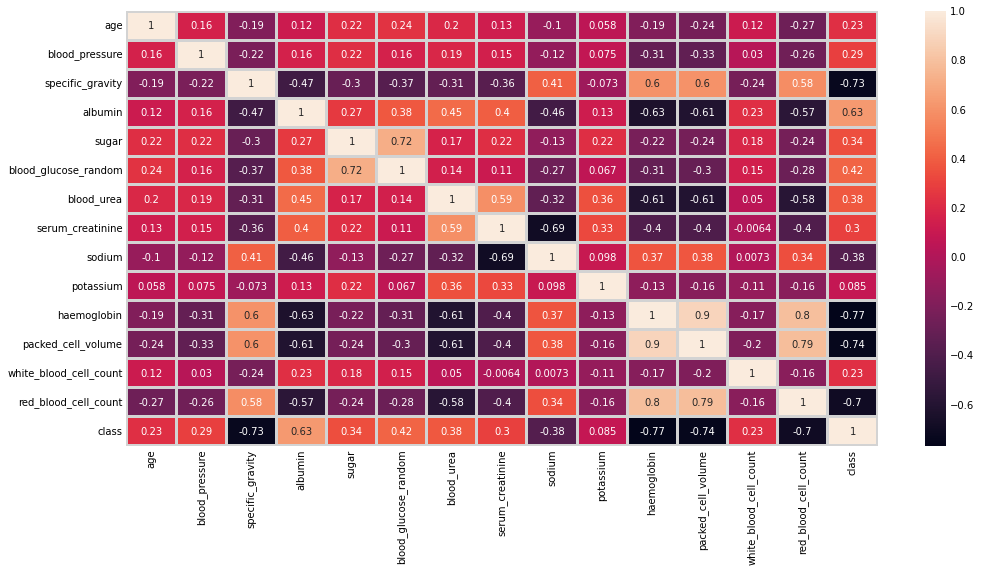

In [25]:
plt.figure(figsize = (15, 8))

sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

In [26]:
df.drop('packed_cell_volume',axis=1,inplace=True)
num_cols.remove('packed_cell_volume')

In [27]:
# check skewness of the distribution 
b=list(num_cols)
skew=[]
for col in b:
    skew.append(round(df[col].skew(),3))
num_dist=pd.DataFrame({'features':b,'skewness':skew})
num_dist

,features,skewness
0,red_blood_cell_count,-0.183
1,haemoglobin,-0.335
2,serum_creatinine,7.510
3,white_blood_cell_count,1.622
4,sugar,2.464
5,potassium,11.583
6,blood_pressure,1.605
7,blood_glucose_random,2.011
8,sodium,-6.997
9,age,-0.668


In [28]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'white_blood_cell_count',
       'red_blood_cell_count', 'hypertension', 'diabetes_mellitus',
       'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia',
       'class'],
      dtype='object')

# Data Analysis
defining functions to create plot

In [29]:
def violin(col):
    fig = px.violin(df, y=col, x="class", color="class", box=True, template = 'plotly_dark')
    return fig.show()

def kde(col):
    grid = sns.FacetGrid(df, hue="class", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()
    
def scatter(col1, col2):
    fig = px.scatter(df, x=col1, y=col2, color="class", template = 'plotly_dark')
    return fig.show()

In [30]:
violin('red_blood_cell_count')

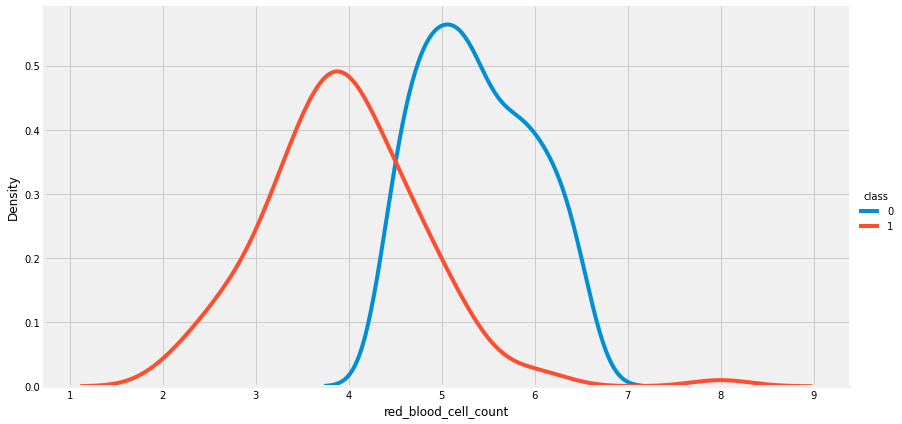

In [31]:
kde('red_blood_cell_count')

In [32]:
violin('white_blood_cell_count')

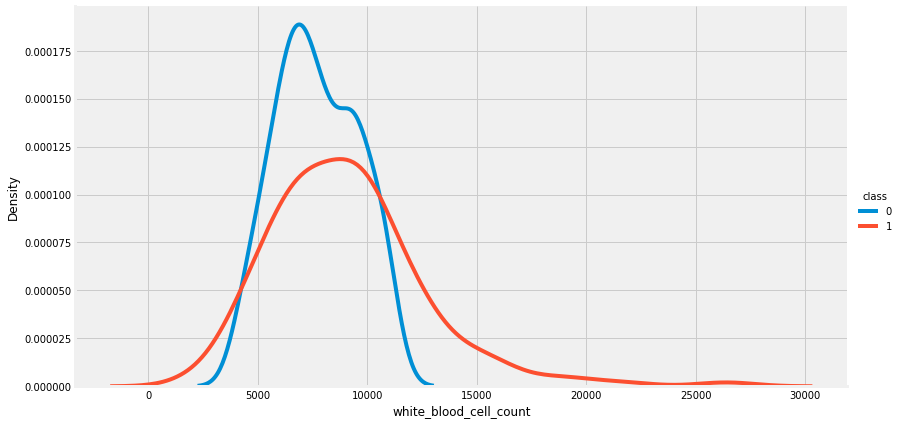

In [33]:
kde('white_blood_cell_count')

In [34]:
violin('haemoglobin')

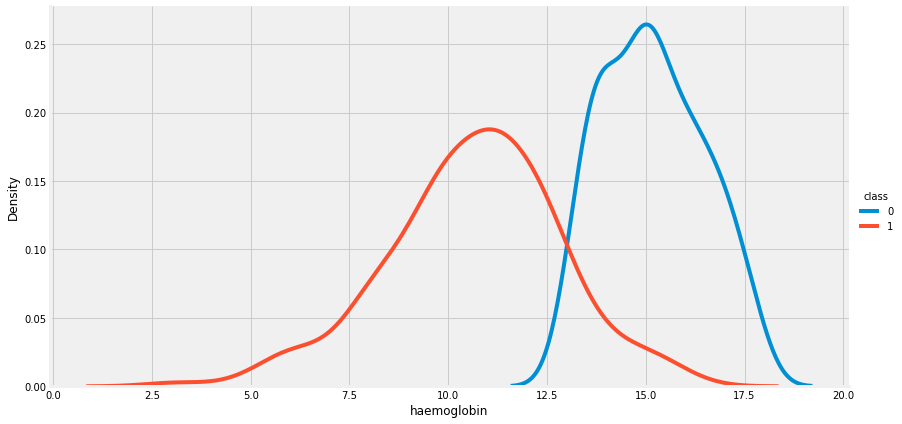

In [35]:
kde('haemoglobin')

In [36]:
violin('albumin')

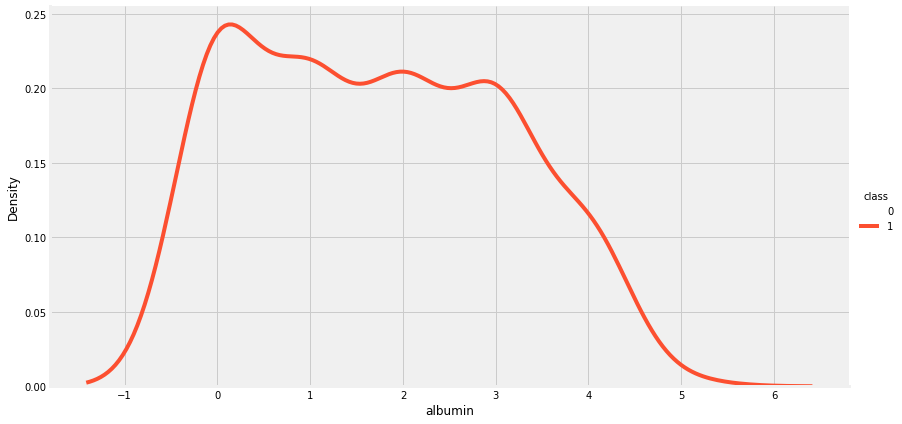

In [37]:
kde('albumin')

In [38]:
violin('blood_glucose_random')

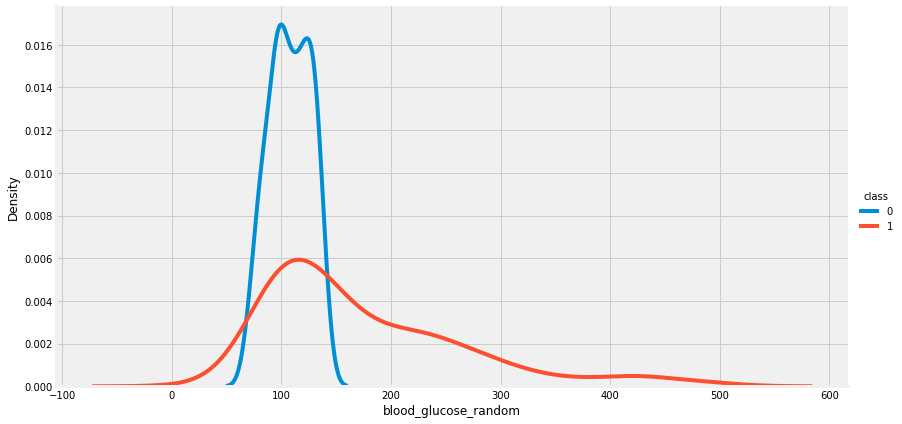

In [39]:
kde('blood_glucose_random')

In [40]:
violin('sodium')

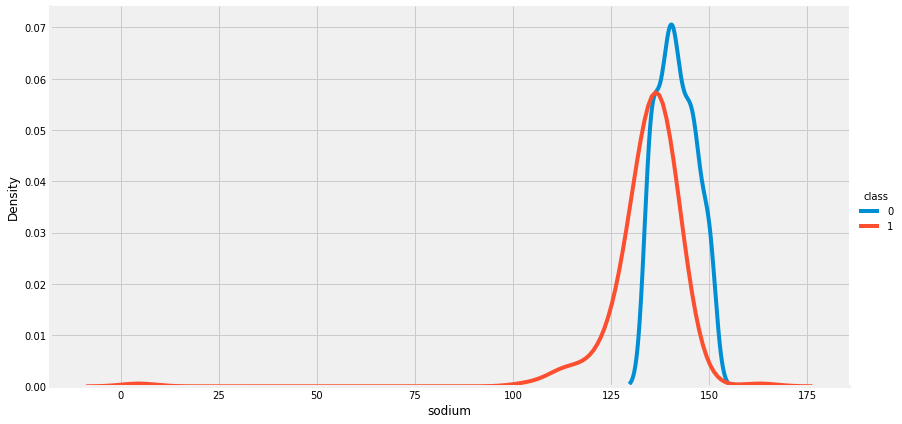

In [41]:
kde('sodium')

In [42]:
violin('blood_urea')

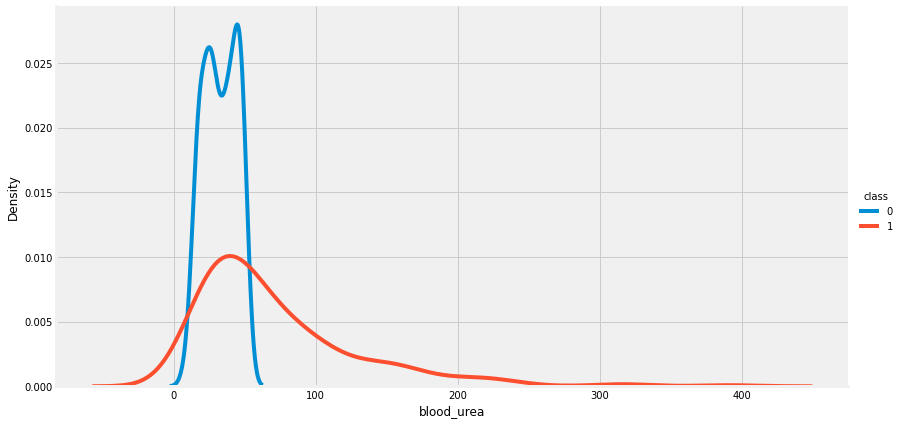

In [43]:
kde('blood_urea')

In [44]:
violin('specific_gravity')

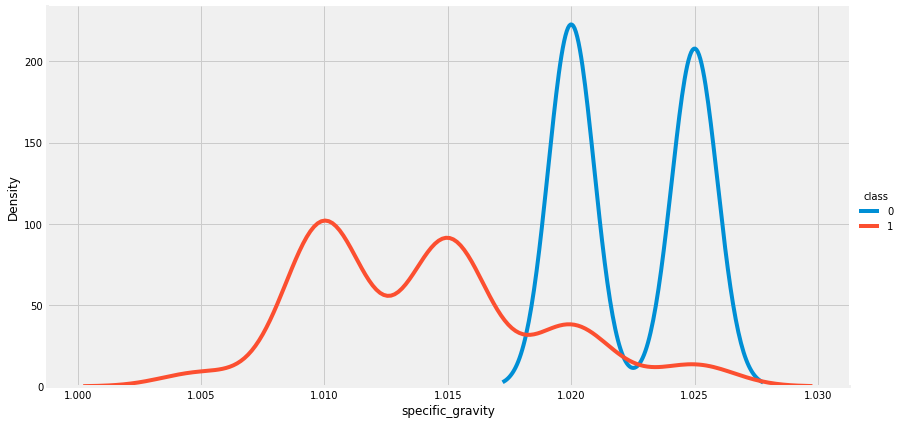

In [45]:
kde('specific_gravity')

In [46]:
scatter('red_blood_cell_count', 'albumin')

In [47]:
scatter('sugar', 'blood_glucose_random')

In [48]:
px.bar(df, x="specific_gravity", y="albumin", color='class', barmode='group', template = 'plotly_dark', height = 400)

In [49]:
px.bar(df, x="blood_pressure", y="haemoglobin", color='class', barmode='group', template = 'plotly_dark', height = 400)

# Data Pre Processing

checking for null values

In [50]:
df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [51]:
df[num_cols].isnull().sum()

red_blood_cell_count      131
haemoglobin                52
serum_creatinine           17
white_blood_cell_count    106
sugar                      49
potassium                  88
blood_pressure             12
blood_glucose_random       44
sodium                     87
age                         9
specific_gravity           47
blood_urea                 19
albumin                    46
dtype: int64

In [52]:
df[cat_cols].isnull().sum()

bacteria                     4
peda_edema                   1
class                        0
pus_cell_clumps              4
appetite                     1
aanemia                      1
pus_cell                    65
diabetes_mellitus            2
coronary_artery_disease      2
red_blood_cells            152
hypertension                 2
dtype: int64

Filling null values

In [53]:
df['blood_glucose_random'].fillna(df['blood_glucose_random'].mean(),inplace=True)
df['blood_pressure'].fillna(df['blood_pressure'].mean(),inplace=True)
df['blood_urea'].fillna(df['blood_urea'].mean(),inplace=True)
df['haemoglobin'].fillna(df['haemoglobin'].mean(),inplace=True)
df['potassium'].fillna(df['potassium'].mean(),inplace=True)
df['red_blood_cell_count'].fillna(df['red_blood_cell_count'].mean(),inplace=True)
df['serum_creatinine'].fillna(df['serum_creatinine'].mean(),inplace=True)
df['sodium'].fillna(df['sodium'].mean(),inplace=True)
df['white_blood_cell_count'].fillna(df['white_blood_cell_count'].mean(),inplace=True)

In [54]:
df['age'].fillna(df['age'].mode()[0],inplace=True)
df['hypertension'].fillna(df['hypertension'].mode()[0],inplace=True)
df['pus_cell_clumps'].fillna(df['pus_cell_clumps'].mode()[0],inplace=True)
df['appetite'].fillna(df['appetite'].mode()[0],inplace=True)
df['albumin'].fillna(df['albumin'].mode()[0],inplace=True)
df['pus_cell'].fillna(df['pus_cell'].mode()[0],inplace=True)
df['red_blood_cells'].fillna(df['red_blood_cells'].mode()[0],inplace=True)
df['coronary_artery_disease'].fillna(df['coronary_artery_disease'].mode()[0],inplace=True)
df['bacteria'].fillna(df['bacteria'].mode()[0],inplace=True)
df['aanemia'].fillna(df['aanemia'].mode()[0],inplace=True)
df['sugar'].fillna(df['sugar'].mode()[0],inplace=True)
df['diabetes_mellitus'].fillna(df['diabetes_mellitus'].mode()[0],inplace=True)
df['peda_edema'].fillna(df['peda_edema'].mode()[0],inplace=True)
df['specific_gravity'].fillna(df['specific_gravity'].mode()[0],inplace=True)

In [55]:
df[num_cols].isnull().sum()

red_blood_cell_count      0
haemoglobin               0
serum_creatinine          0
white_blood_cell_count    0
sugar                     0
potassium                 0
blood_pressure            0
blood_glucose_random      0
sodium                    0
age                       0
specific_gravity          0
blood_urea                0
albumin                   0
dtype: int64

In [56]:
df[cat_cols].isnull().sum()

bacteria                   0
peda_edema                 0
class                      0
pus_cell_clumps            0
appetite                   0
aanemia                    0
pus_cell                   0
diabetes_mellitus          0
coronary_artery_disease    0
red_blood_cells            0
hypertension               0
dtype: int64

# Feature Encoding

In [57]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

bacteria has 2 categories

peda_edema has 2 categories

class has 2 categories

pus_cell_clumps has 2 categories

appetite has 2 categories

aanemia has 2 categories

pus_cell has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

red_blood_cells has 2 categories

hypertension has 2 categories



# Label encoding

In [58]:
from sklearn.preprocessing import LabelEncoder

for col in cat_cols:
    print("LABEL ENCODING OF:",col)
    LEi=LabelEncoder()
    print(c(df[col]))
    df[col]=LEi.fit_transform(df[col])
    print(c(df[col]))
    print("*"*100)

LABEL ENCODING OF: bacteria
Counter({'notpresent': 378, 'present': 22})
Counter({0: 378, 1: 22})
****************************************************************************************************
LABEL ENCODING OF: peda_edema
Counter({'no': 324, 'yes': 76})
Counter({0: 324, 1: 76})
****************************************************************************************************
LABEL ENCODING OF: class
Counter({1: 250, 0: 150})
Counter({1: 250, 0: 150})
****************************************************************************************************
LABEL ENCODING OF: pus_cell_clumps
Counter({'notpresent': 358, 'present': 42})
Counter({0: 358, 1: 42})
****************************************************************************************************
LABEL ENCODING OF: appetite
Counter({'good': 318, 'poor': 82})
Counter({0: 318, 1: 82})
****************************************************************************************************
LABEL ENCODING OF: aanemia
Counter({'no': 

In [59]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,36.0,1.2,137.528754,4.627244,15.4,7800.0,5.200000,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,18.0,0.8,137.528754,4.627244,11.3,6000.0,4.707435,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,53.0,1.8,137.528754,4.627244,9.6,7500.0,4.707435,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,56.0,3.8,111.000000,2.500000,11.2,6700.0,3.900000,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,26.0,1.4,137.528754,4.627244,11.6,7300.0,4.600000,0,0,0,0,0,0,1


In [60]:
# scaling with MinMaxScaler
from sklearn.preprocessing import StandardScaler,MinMaxScaler           
mm_scaler=MinMaxScaler()
df[b]=mm_scaler.fit_transform(df[b])

In [61]:
from sklearn.model_selection import train_test_split
x=df.drop('class',axis=1)
y=df['class']

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
print("X_train size {} , X_test size {}".format(X_train.shape,X_test.shape))

X_train size (320, 23) , X_test size (80, 23)


In [62]:
# Using GridSearchCV we find the best algorithm to this problem
from sklearn.model_selection import ShuffleSplit,GridSearchCV,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [63]:
# Crete a function to find the best algo. for this problem
def find_best_model(x,y):
    models={'Logistic_regression':{'model':LogisticRegression(solver='liblinear',penalty='l2',multi_class='auto'),'parameter':{'C':[1,4,8]}},
           'decision_tree':{'model':DecisionTreeClassifier(splitter='best'),'parameter':{'criterion':['gini','entropy'],'max_depth':[5,7,13,15]}},
           'random_forest':{'model':RandomForestClassifier(criterion='gini'),'parameter':{'max_depth':[5,10,15],'n_estimators':[1,3,5]}}}
    scores=[]
    cv_shuffle=StratifiedKFold(n_splits=10)
    
    for model_name,model_params in models.items():
        gs=GridSearchCV(model_params['model'],model_params['parameter'],cv=cv_shuffle,return_train_score=False)
        gs.fit(x,y)
        scores.append({'model':model_name,'best_parameters':gs.best_params_,'score':gs.best_score_})
    return pd.DataFrame(scores,columns=['model','best_parameters','score'])
find_best_model(X_train,y_train)

,model,best_parameters,score
0,Logistic_regression,{'C': 4},0.975000
1,decision_tree,"{'criterion': 'entropy', 'max_depth': 13}",0.978125
2,random_forest,"{'max_depth': 15, 'n_estimators': 5}",0.984375


In [64]:
# Using cross_val_score for gaining average accuracy
from sklearn.model_selection import cross_val_score
score=cross_val_score(RandomForestClassifier(max_depth=15,n_estimators=5),X_train,y_train,cv=10)
print("Average Accuracy Score {}".format(score.mean()))

Average Accuracy Score 0.975


In [65]:
# Creating Random Forest model
rf=RandomForestClassifier(max_depth=5,n_estimators=5)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=5)

In [66]:
# Creating a confusion matrix
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
y_pred=rf.predict(X_test)
cm=confusion_matrix(y_pred,y_test)
cm

array([[27,  0],
       [ 1, 52]])

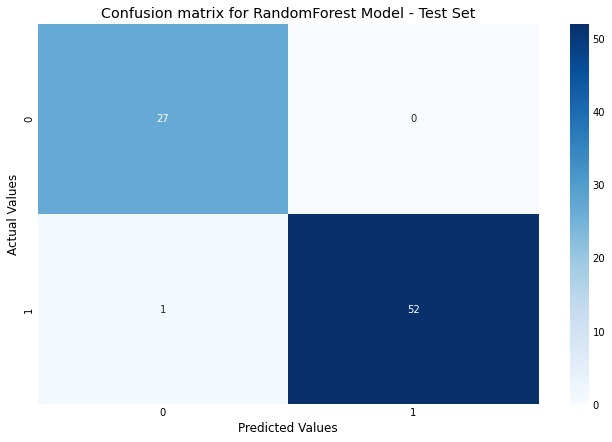

In [67]:
# Plotting the confusion matrix
plt.figure(figsize=(10,7))
p = sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Confusion matrix for RandomForest Model - Test Set')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [68]:
# Accuracy score
score=round(accuracy_score(y_test,y_pred),3)
print("Accuracy on the Test set: {}".format(score))

Accuracy on the Test set: 0.988


In [69]:
# Classification report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.98      1.00      0.99        52

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



In [70]:
# Creating a confusion matrix for training set
y_train_pred=rf.predict(X_train)
cm=confusion_matrix(y_train,y_train_pred)
cm

array([[120,   2],
       [  2, 196]])

In [71]:
# Accuracy score
score=round(accuracy_score(y_train,y_train_pred),3)
print("Accuracy on training set: {}".format(score))

Accuracy on training set: 0.988


In [72]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       122
           1       0.99      0.99      0.99       198

    accuracy                           0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320



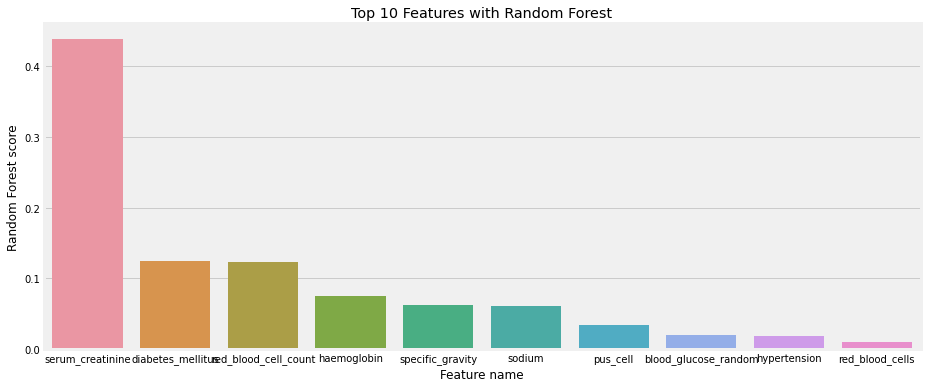

In [73]:
# Top 10 Features
feature_scores=pd.DataFrame(rf.feature_importances_,columns=['Score'],index=X_train.columns).sort_values(by='Score',ascending=False)
top10_feature = feature_scores.nlargest(n=10, columns=['Score'])

plt.figure(figsize=(14,6))
g = sns.barplot(x=top10_feature.index, y=top10_feature['Score'])
p = plt.title('Top 10 Features with Random Forest')
p = plt.xlabel('Feature name')
p = plt.ylabel('Random Forest score')
p = g.set_xticklabels(g.get_xticklabels())

In [74]:
X_train=X_train[['age','blood_urea','blood_glucose_random','coronary_artery_disease','aanemia','pus_cell','red_blood_cells',
         'diabetes_mellitus','peda_edema']]
X_test=X_test[['age','blood_urea','blood_glucose_random','coronary_artery_disease','aanemia','pus_cell','red_blood_cells',
         'diabetes_mellitus','peda_edema']]
rf.fit(X_train,y_train)
def predict(age,blood_urea,blood_glucose_random,coronary_artery_disease,aanemia,pus_cell,red_blood_cells,diabetes_mellitus,peda_edema):
    age=int(age)
    blood_urea=float(blood_urea)
    blood_glucose_random=float(blood_glucose_random)
    coronary_artery_disease=int(coronary_artery_disease)
    aanemia=int(aanemia)
    pus_cell=int(pus_cell)
    red_blood_cells=int(red_blood_cells)
    red_blood_cells=int(red_blood_cells)
    peda_edema=int(peda_edema)
    
    x=[[age,blood_urea,blood_glucose_random,coronary_artery_disease,aanemia,pus_cell,red_blood_cells,diabetes_mellitus,peda_edema]]
    return rf.predict(x)

In [75]:
# Prediction 1
# input parameter : age,blood_urea,blood_glucose_random,coronary_artery_disease,
#aanemia,pus_cell,red_blood_cells,diabetes_mellitus,peda_edema
prediction = predict(19,18.2,125.5,0,0,1,1,0,0)[0]
if prediction:
  print('Oops! You have Chronic Kidney Disease.')
else:
  print("Great! You don't have Chronic Kidney Disease.")

Oops! You have Chronic Kidney Disease.


In [76]:
# Prediction 2
# input parameter : age,blood_urea,blood_glucose_random,coronary_artery_disease,
#aanemia,pus_cell,red_blood_cells,diabetes_mellitus,peda_edema
prediction = predict(40,30,165,1,1,0,0,1,1)[0]
if prediction:
  print('Oops! You have Chronic Kidney Disease.')
else:
  print("Great! You don't have Chronic Kidney Disease.")

Oops! You have Chronic Kidney Disease.


In [77]:
pickle.dump(rf,open('Chronic_Kidney_Disease.pk1','wb'))